# <big> Supporting Information </big>

Code to generate Figures S1-S7, Tables S1-S3, and miscellaneous results.

# Contents

* Table S1
* Figure S1
* Table S2
* Figure S2
* Figure S3
* Figure S4
* Figure S5
* Figure S6
* Table S3
* Figure S1


# Load packages 

In [1]:
run RNA_simulation.py

In [2]:
%matplotlib inline
%load_ext rpy2.ipython
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import t

In [3]:
sns.set_context("notebook", font_scale=3)
sns.set_style("ticks", {'axes.linewidth': 4, 'axes.edgecolor': 'grey', 
    'xtick.major.size': 20, 'ytick.color': 'grey', 'ytick.major.size': 20, 
    'xtick.color': 'grey'})

# Load data 

In [4]:
path = 'stats/bp_12/'
stat = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat[count] = run
        file.close()
        count += 1

In [5]:
path = 'stats/multi_hit/bp_12/'
stat_m = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_m[count] = run
        file.close()
        count += 1

In [6]:
path = 'stats/bp_4/'
stat_4 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_4[count] = run
        file.close()
        count += 1

In [7]:
path = 'stats/bp_8/'
stat_8 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_8[count] = run
        file.close()
        count += 1

In [8]:
path = 'stats/bp_16/'
stat_16 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_16[count] = run
        file.close()
        count += 1

In [9]:
path = 'stats/bp_20/'
stat_20 = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat_20[count] = run
        file.close()
        count += 1

# Table S1

## GC content

In [10]:
def get_GC(seq):
    '''
    Calculate GC content of a sequence.
    '''
    G = seq.count('G')
    C = seq.count('C')
    A = seq.count('A')
    U = seq.count('U')
    return (G + C) / float(A + U + G + C)

In [11]:
GC_content = []
for i in stat.values():
    GC_content.append(get_GC(i['ancestor']))

In [12]:
print np.mean(GC_content).round(2), np.std(GC_content).round(2)

0.52 0.05


## Hamming distance from reference sequence

In [13]:
ham = []
for i in stat.values():
    ham.append(RNASeq.get_hamdist(i['ancestor'], i['ref_seq']))

In [14]:
print np.mean(ham).round(2), np.std(ham).round(2)

55.94 5.09


## Minimum free energy

In [15]:
mfe = []
for i in stat.values():
    mfe.append(RNASeq(i['ancestor']).mfe)

In [16]:
print np.mean(mfe).round(2), np.std(mfe).round(2)

-24.98 6.02


## Number of base pairs

In [17]:
bp_n = []
for i in stat.values():
    bp_n.append(RNASeq(i['ancestor']).bp)

In [18]:
print np.mean(bp_n).round(2), np.std(bp_n).round(2)

25.63 3.99


## Base-pair distance from the reference

In [19]:
bp_d = []
for i in stat.values():
    bp_d.append(RNASeq(i['ancestor']).get_bp_distance(RNASeq(i['ref_seq'])))

In [20]:
print np.mean(bp_d).round(2), np.std(bp_d).round(2)

11.24 1.1


## Pairwise base-pair distance

In [21]:
anc = []
for i in stat.values():
    anc.append(RNASeq(i['ancestor']))
pairs = list(combinations(anc,2))
anc_bp_d = [i[0].get_bp_distance(i[1]) for i in pairs]

In [22]:
print np.mean(anc_bp_d).round(2), np.std(anc_bp_d).round(2)

50.93 5.8


## Proportion of inviable mutations

**Warning:** the following command takes several minutes to run.

In [36]:
%%time
inv = []
for i in stat.values():
    j = Evolution(i['ref_seq'], 12)
    k = j.get_inviable_neighbors(i['ancestor'])
    inv.append(len(k))
pinv = np.array(inv) / 300.

CPU times: user 18min 53s, sys: 6.98 s, total: 19min
Wall time: 19min 17s


In [39]:
print pinv.mean().round(2), pinv.std().round(2)

0.58 0.12


# Figure S1: Allowing sites to undergo multiple substitutions does not affect the pattern of accumulation of inviable introgressions

Compare to Figure 2.

In [10]:
single_m = []
for i in stat_m.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_m.append((a + b)/2.)
single_m = pd.DataFrame(single_m)

double_m = []
for i in stat_m.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_m.append((a + b)/2.)
double_m = pd.DataFrame(double_m)

triple_m = []
for i in stat_m.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_m.append((a + b)/2.)
triple_m = pd.DataFrame(triple_m)

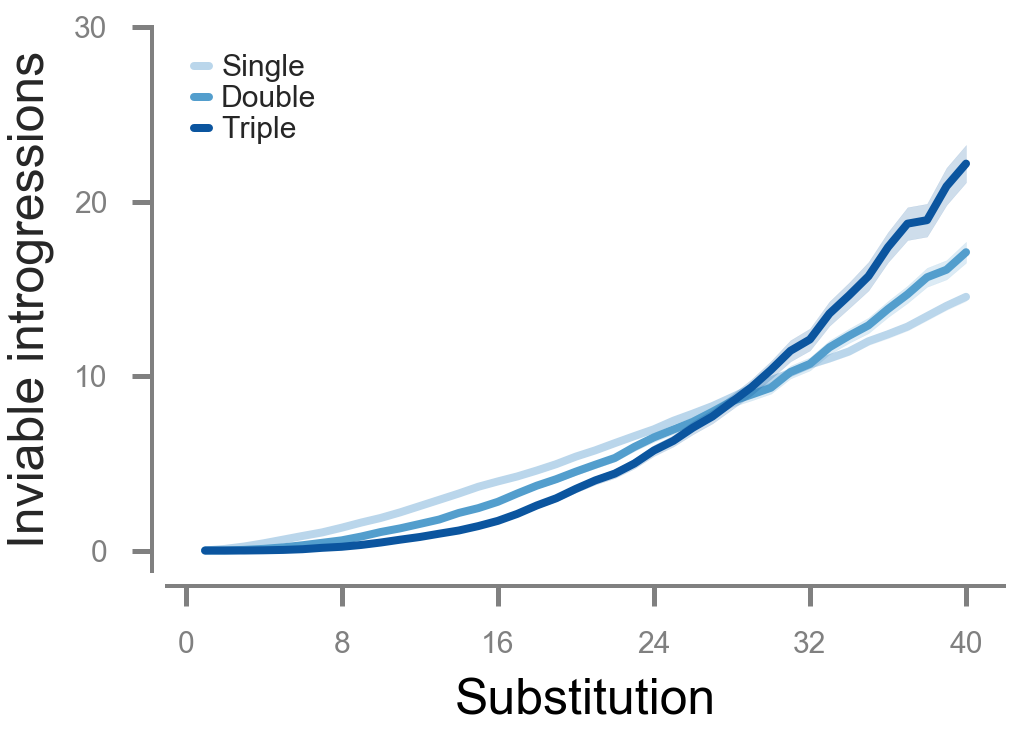

In [11]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col=(0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0=1.96* single_m.std() / np.sqrt(len(single_m))
plt.errorbar(x, single_m.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=2, label=r'Single')
ax.fill_between(x, single_m.mean() - err0, single_m.mean() + err0, alpha=.2, 
    zorder=2, color=col)

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err1=1.96* double_m.std() / np.sqrt(len(double_m))
plt.errorbar(x, double_m.mean(), linewidth=8, clip_on=False, color= col, 
    zorder=3, label=r'Double')
ax.fill_between(x, double_m.mean() - err1, double_m.mean() + err1, alpha=.2, 
    zorder=3, color=col)

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err2=1.96* triple_m.std() / np.sqrt(len(triple_m))
plt.errorbar(x, triple_m.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=4, label=r'Triple')
ax.fill_between(x, triple_m.mean() - err2, triple_m.mean() + err2, alpha=.2, 
    zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', 
    handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,
    numpoints=1, markerscale=0.3);

# Table S2: Estimates of the parameters in Equation 6 

Equation 6:

$$ J_k^{(i)} = a_i (k - i)^{b_i}$$

where $J_k^{(i)}$ is the number of inviable introgressions of $i$ alleles, $k$ is the number of substitutions, and $a_i$ and $b_i$ are parameters.

The model was fitted by non-linear least-squares regression to the average numbers of inviable single, double, and triple introgressions shown in Figure S1.

## Single introgressions $(i = 1)$

In [25]:
y = np.array(single_m.mean())
x = np.arange(1, 41, 1)

In [26]:
%%R -i x -i y
inv1 = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
summary(inv1)


Formula: y ~ a1 * (x - 1)^b1

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a1 0.094119   0.001572   59.89   <2e-16 ***
b1 1.374707   0.004883  281.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06228 on 38 degrees of freedom

Number of iterations to convergence: 8 
Achieved convergence tolerance: 7.231e-06



In [27]:
%%R 
summary(inv1)$coefficients[,2] * qt(.975, summary(inv1)$df[2])

         a1          b1 
0.003181484 0.009884402 


## Double introgressions $(i = 2)$

In [28]:
y = np.array(double_m.mean())[1:]
x = np.arange(2, 41, 1)

In [29]:
%%R -i x -i y
inv2 = nls(y ~ a2 * (x - 2) ^ b2, start=list(a2=.1, b2=.1))
summary(inv2)


Formula: y ~ a2 * (x - 2)^b2

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a2 0.024038   0.001048   22.94   <2e-16 ***
b2 1.802102   0.012671  142.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1376 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 4.331e-08



In [30]:
%%R 
summary(inv2)$coefficients[,2] * qt(.975, summary(inv2)$df[2])

         a2          b2 
0.002123065 0.025674197 


## Triple introgressions $(i = 3)$

In [31]:
y = np.array(triple_m.mean())[2:]
x = np.arange(3, 41, 1)

In [32]:
%%R -i x -i y
inv3 = nls(y ~ a3 * (x - 3) ^ b3, start=list(a3=.1, b3=.1))
summary(inv3)


Formula: y ~ a3 * (x - 3)^b3

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a3 0.0035887  0.0002194   16.35   <2e-16 ***
b3 2.4191925  0.0176877  136.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1768 on 36 degrees of freedom

Number of iterations to convergence: 15 
Achieved convergence tolerance: 2.386e-08



In [34]:
%%R 
summary(inv3)$coefficients[,2] * qt(.975, summary(inv3)$df[2])

          a3           b3 
0.0004450318 0.0358723132 


# Figure S2: Inviable single introgressions assuming that they are all based on simple DMIs evolving according to the Orr model

In [12]:
def orr(k, p):
    '''
    Expected number of simple DMIs after k substitutions according to the 
    Orr (1995) model.
        
    Equation 2 in main text.
    
    Parameters
    ----------
    k : int
        Number of substitutions
    p : float
        Probability that there is a simple DMI between the latest derived 
        allele and one of the k alleles at the loci that have previously 
        undergone substitutions.
    '''
    return p * k * (k - 1.) / 2.

def inv_introgr(k, p):
    '''
    Expected number of inviable single introgressions after k substitutions 
    assuming that they are all based on simple DMIs evolving according to the
    Orr model.
        
    Equation 8 in main text.
    
    Parameters
    ----------
    See orr().
    '''
    return k - (1. - (1. - p) ** k) / p

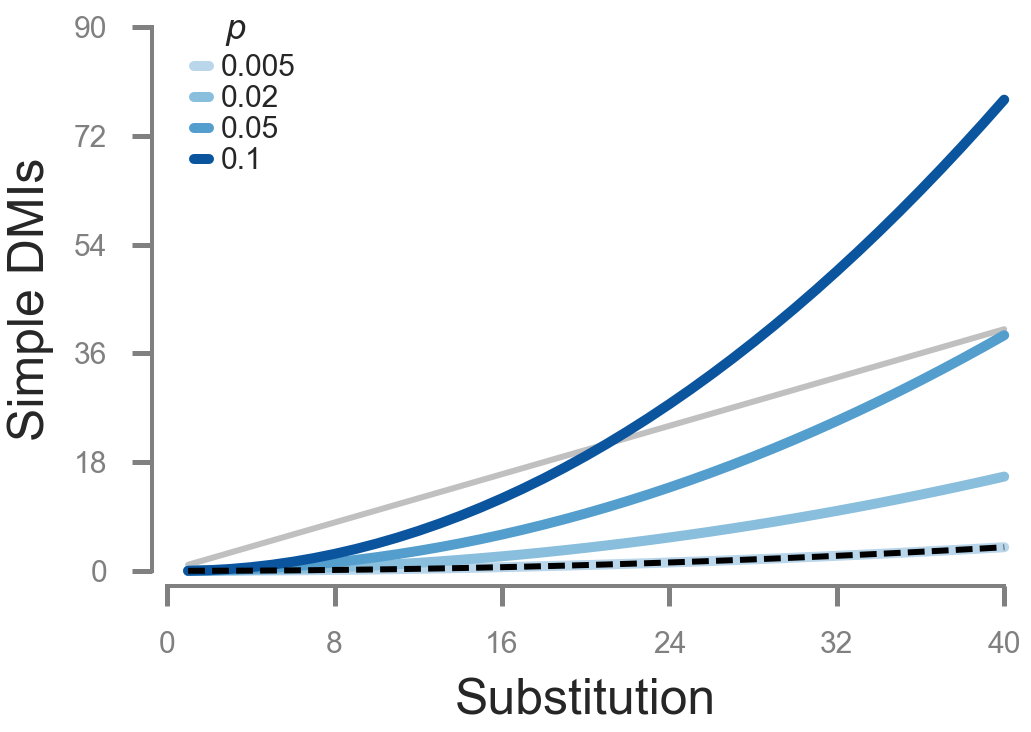

In [16]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

plt.plot(x, x, color='silver', linewidth=6, clip_on=False)

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
plt.plot(x, [orr(i, 0.005) for i in x], color=col, linewidth=10, clip_on=False, 
    label=r'0.005')

col=(0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
plt.plot(x, [orr(i, 0.02) for i in x], color= col, linewidth=10, clip_on=False, 
    label=r'0.02')

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
plt.plot(x, [orr(i, 0.05) for i in x], color= col, linewidth=10, clip_on=False,     
    label=r'0.05')

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
plt.plot(x, [orr(i, 0.1) for i in x],
    color=col, linewidth=10, clip_on=False, label=r'0.1')

plt.plot(x,  [orr(i, 0.005) for i in x], '--', color='black', linewidth=6, 
    clip_on=False)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Simple DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 90, 6))
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40], [  0,   8,  16,  24,  32,  40])
plt.ylim(0)
plt.xlim(0,40)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', 
    handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,
    numpoints=1., markerscale=1)

plt.text(2.8,88, r'p', style='italic');

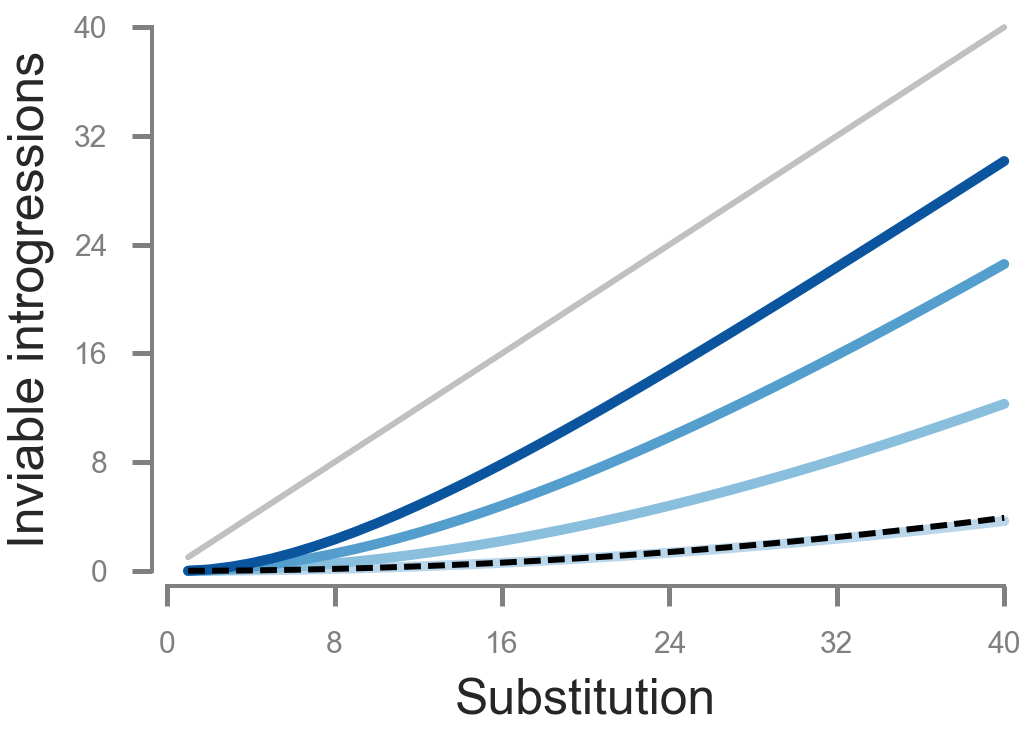

In [14]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

plt.plot(x, x, color='silver', linewidth=6, clip_on=False)

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
plt.plot(x, [inv_introgr(i, 0.005) for i in x], color=col, linewidth=10, 
    clip_on=False, label=r'0.005')

col=(0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
plt.plot(x, [inv_introgr(i, 0.02) for i in x], color= col, linewidth=10, 
    clip_on=False, label=r'0.02')

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
plt.plot(x, [inv_introgr(i, 0.05) for i in x], color= col, linewidth=10, 
    clip_on=False, label=r'0.05')

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
plt.plot(x, [inv_introgr(i, 0.1) for i in x],
    color=col, linewidth=10, clip_on=False, label=r'0.1')

plt.plot(x,  [orr(i, 0.005) for i in x], '--', color='black', linewidth=6, 
    clip_on=False)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 40, 6))
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40], [  0,   8,  16,  24,  32,  40])
plt.ylim(0,40)
plt.xlim(0,40);

Fitting the model in Equation 6 to each trend:

In [38]:
x = np.arange(1, 41)
y = inv_introgr(x, .005)

In [39]:
%%R -i x -i y
inv = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
inv

Nonlinear regression model
  model: y ~ a1 * (x - 1)^b1
   data: parent.frame()
      a1       b1 
0.003262 1.917295 
 residual sum-of-squares: 7.445e-05

Number of iterations to convergence: 12 
Achieved convergence tolerance: 1.555e-07


In [40]:
y = inv_introgr(x, .02)

In [41]:
%%R -i y
inv = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
inv

Nonlinear regression model
  model: y ~ a1 * (x - 1)^b1
   data: parent.frame()
     a1      b1 
0.01702 1.79782 
 residual sum-of-squares: 0.02107

Number of iterations to convergence: 11 
Achieved convergence tolerance: 5.632e-06


In [42]:
y = inv_introgr(x, .05)

In [43]:
%%R -i y
inv = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
inv

Nonlinear regression model
  model: y ~ a1 * (x - 1)^b1
   data: parent.frame()
     a1      b1 
0.06223 1.61174 
 residual sum-of-squares: 0.5428

Number of iterations to convergence: 11 
Achieved convergence tolerance: 1.378e-08


In [44]:
y = inv_introgr(x, .1)

In [45]:
%%R -i y
inv = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
inv

Nonlinear regression model
  model: y ~ a1 * (x - 1)^b1
   data: parent.frame()
    a1     b1 
0.1742 1.4111 
 residual sum-of-squares: 2.608

Number of iterations to convergence: 10 
Achieved convergence tolerance: 2.424e-06


# Figure S3: The probability that a simple DMI appears is approximately constant in the RNA model

If $p$ declines with divergence according to the relationship:

$$ p_k = p_0 + c k$$

where $c < 0$, the inviable single introgressions will accumulate more slowly.  

We estimate $p_0$ and $c$ by nonlinear least-squares regression.

In [46]:
def inv_introgr2(p0, c):
    '''
    Expected number of inviable single introgressions for k = 40 substitutions 
    assuming that they are all based on simple DMIs evolving according to the
    Orr model with a linearly changing p = p0 + c * k.
    '''
    J = [0]
    for k in range(1, 40):
        p = p0 + c * k
        J.append(J[k-1] + 1 - (1 - p) ** k)
    return np.array(J)

In [47]:
single = []
for i in stat.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single.append((a + b) / 2.)
single = pd.DataFrame(single)
sin = np.array(single.mean())

In [48]:
def fit_inv_introgr2(pars):
    '''
    Calculate the sum of squared deviations between the observed inviable 
    single introgression data and the expected values obtained from 
    inv_introgr2(p0, c).
    '''
    p0, c = pars
    return np.power(sin - inv_introgr2(p0, c), 2).sum()

In [49]:
coef = minimize(fit_inv_introgr2, [.02, 0])['x']
coef

array([ 0.04310086, -0.00081944])

Thus, we estimate $p_0 = 0.0431$ and $c = -0.00081944$.  This pattern of change in $p$ is expected to lead to an accumulation of $\sim 17$ simple DMIs after $k = 40$ substitutions.

In [50]:
def orr2(p0, c):
    '''
    Expected number of simple DMIs for k = 40 substitutions according to the
    Orr model with a linearly changing p = p0 + c * k.
    '''
    I = [0]
    for k in range(1, 40):
        p = p0 + c * k
        I.append(I[k-1] + k * p)
    return np.array(I)

Now we test whether $p$ actually declined in our simulations.  We find that $p$ is approximately constant. 

In [125]:
data = pd.read_csv('stats/bp_12_p/p_0.csv', header=None, names=['k', 'p'])
for i in range(1, 1000):
    tmp = pd.read_csv('stats/bp_12_p/p_{0}.csv'.format(i), header=None, names=['k', 'p'])
    data = pd.concat([data, tmp])

In [126]:
gdata = data.groupby('k')
x = np.array(gdata.mean().index)
y = np.array(gdata.mean())

In [127]:
y_err = 1.96 * np.array(gdata.std()) / np.sqrt(1000)

In [54]:
%%R -i x -i y -o coef2
lin = lm(y ~ x)
coef2 = lin$coef
summary(lin)


Call:
lm(formula = y ~ x)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0012570 -0.0008773  0.0000865  0.0008875  0.0010509 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.824e-02  5.974e-04 147.695 1.72e-13 ***
x           -9.917e-05  2.601e-05  -3.813  0.00661 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0009942 on 7 degrees of freedom
Multiple R-squared:  0.675,	Adjusted R-squared:  0.6285 
F-statistic: 14.54 on 1 and 7 DF,  p-value: 0.006606



In [55]:
coef[1] / coef2[1]

8.2633382476992079

In [56]:
coef2

array([  8.82360420e-02,  -9.91660651e-05])

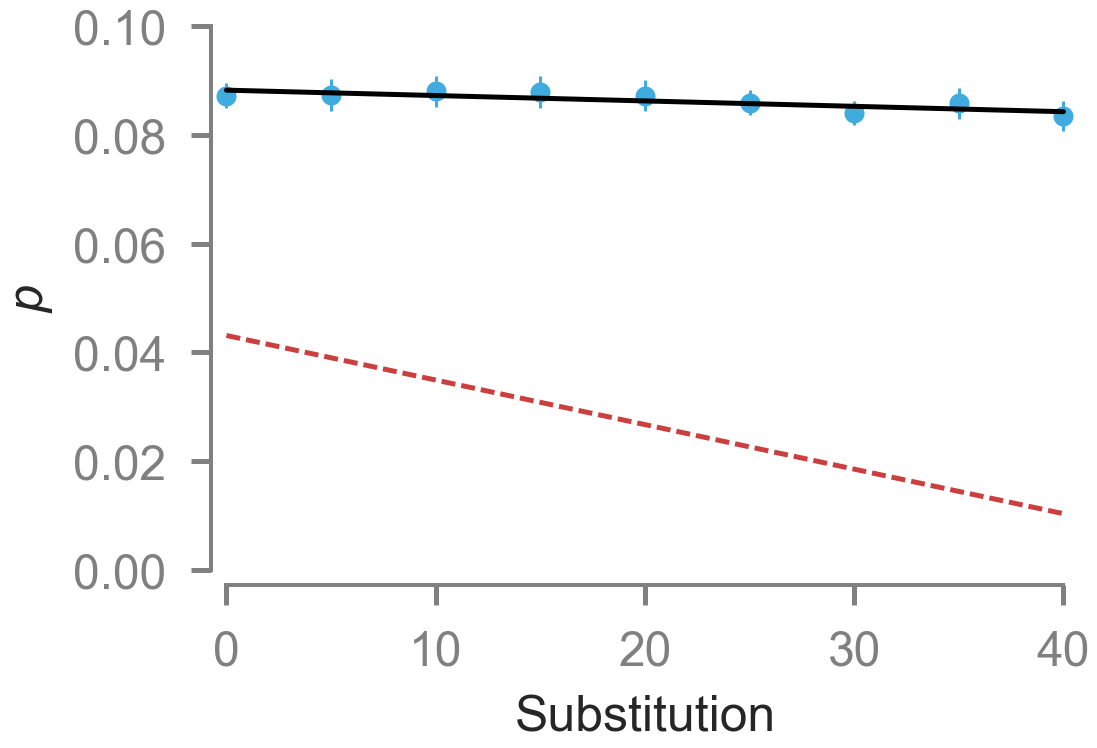

In [128]:
x = [0, 5, 10, 15, 20, 25, 30, 35, 40]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

eb = plt.errorbar(x, y, yerr=y_err, fmt='o', linewidth=3, capsize=0, zorder=1, 
    markersize=20, clip_on=False, mew=0.01, elinewidth=3, 
    color='#40ABDF', ecolor='#40ABDF')

for bar in eb[2]:
    bar.set_clip_on(False)

plt.plot(x, [coef2[0] + coef2[1] * i for i in x], linewidth=5, 
    clip_on=False, color='black', zorder=2)

plt.plot(x, [coef[0] + coef[1] * i for i in x], linewidth=5, ls='--',
    clip_on=False, color='#CC3F3F', zorder=2)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'p', fontsize= 50, labelpad=20, style='italic')
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.ylim(0., .1)
plt.xlim(0, 40);

In addition, fitting the snowball model to the RNA folding data underestimated the true value of $p$ by approximately 3-fold.

In [59]:
print y.mean(), y.mean() / 0.0263710

0.0863408682933 3.27408396698


# Figure S4: The numbers of inviable single and double introgressions after $k=40$ substitutions are negatively correlated

In [129]:
data2 = pd.read_csv('bp_12_introgr.csv')
del data2['Unnamed: 0']
data2.head()

,ref bp,holeyness,final_single,final_double,final_triple
0,29,0.503231,9.0,24.0,35.5
1,25,0.739809,22.5,6.5,8.5
2,24,0.611972,15.0,9.0,24.5
3,19,0.536040,12.0,13.5,8.0
4,29,0.590969,12.0,11.0,31.0


In [131]:
%%R -i data2
cor.test(data2$final_single, data2$final_double, method="spe")


	Spearman's rank correlation rho

data:  data2$final_single and data2$final_double
S = 244800000, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4688262 



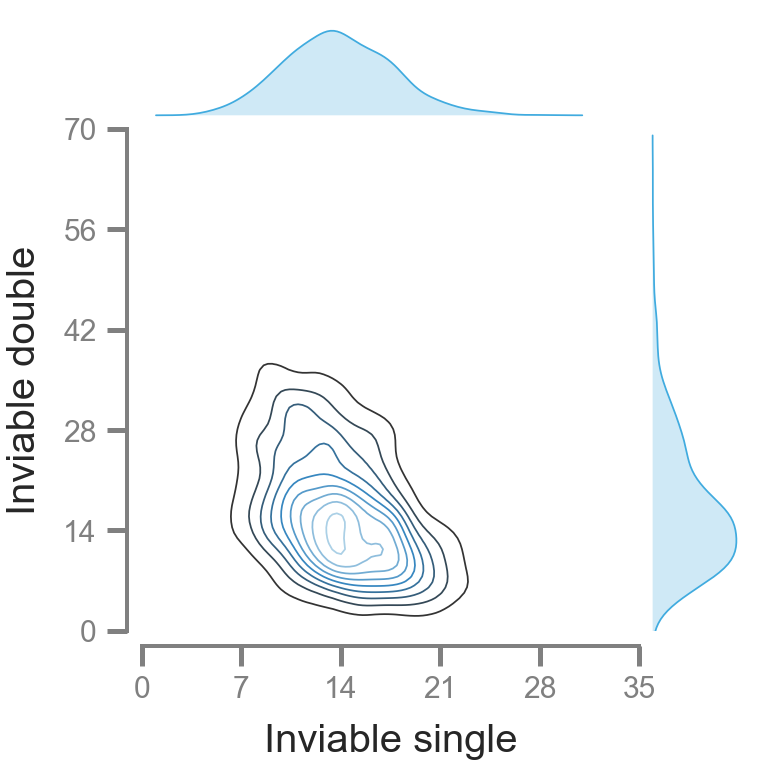

In [132]:
g = sns.JointGrid(x=data2['final_single'], y=data2['final_double'], size=11, 
    space=0.1, xlim=(0, 35), ylim=(0, 70))#, ratio=1)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, color='#40ABDF', shade=True)
g.ax_joint.set_xticks(np.linspace(0, 35, 6))
g.ax_joint.set_yticks(np.linspace(0, 70, 6))
g.ax_joint.set_xlabel('Inviable single', fontdict={'size': 40}, labelpad=20)
g.ax_joint.set_ylabel('Inviable double', fontdict={'size': 40}, labelpad=20)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.tick_params(width=5, pad=10)
g.ax_joint.spines['left'].set_position(('outward', 15))
g.ax_joint.spines['bottom'].set_position(('outward', 15))

# Figure S5: Holeyness decreases with $\alpha$ and increases with the number of base pairs, $\beta$, in the reference sequence

In [134]:
try:
    del data3
except NameError:
    pass
for alpha in [4, 8, 12, 16, 20]:
    tmp = pd.read_csv("holeyness_alpha_" + str(alpha))
    tmp['alpha'] = alpha
    try:
        data3 = pd.concat([data3, tmp])
    except NameError:
        data3 = tmp
del data3['Unnamed: 0']
data3.head()

,BP_ref,holeyness,alpha
0,20,0.643703,4
1,27,0.706545,4
2,28,0.604847,4
3,27,0.613380,4
4,29,0.639602,4


In [135]:
%%R -i data3
cor.test(data3$BP_ref, data3$holeyness, method="spe")


	Spearman's rank correlation rho

data:  data3$BP_ref and data3$holeyness
S = 1.8043e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1339268 



In [136]:
%%R
cor.test(data3$alpha, data3$holeyness, method="spe")


	Spearman's rank correlation rho

data:  data3$alpha and data3$holeyness
S = 3.0744e+10, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4757232 



In [137]:
gdata = data3.groupby('alpha')
m = gdata.mean()
ci = 1.96 * gdata.std() / np.sqrt(1000) 

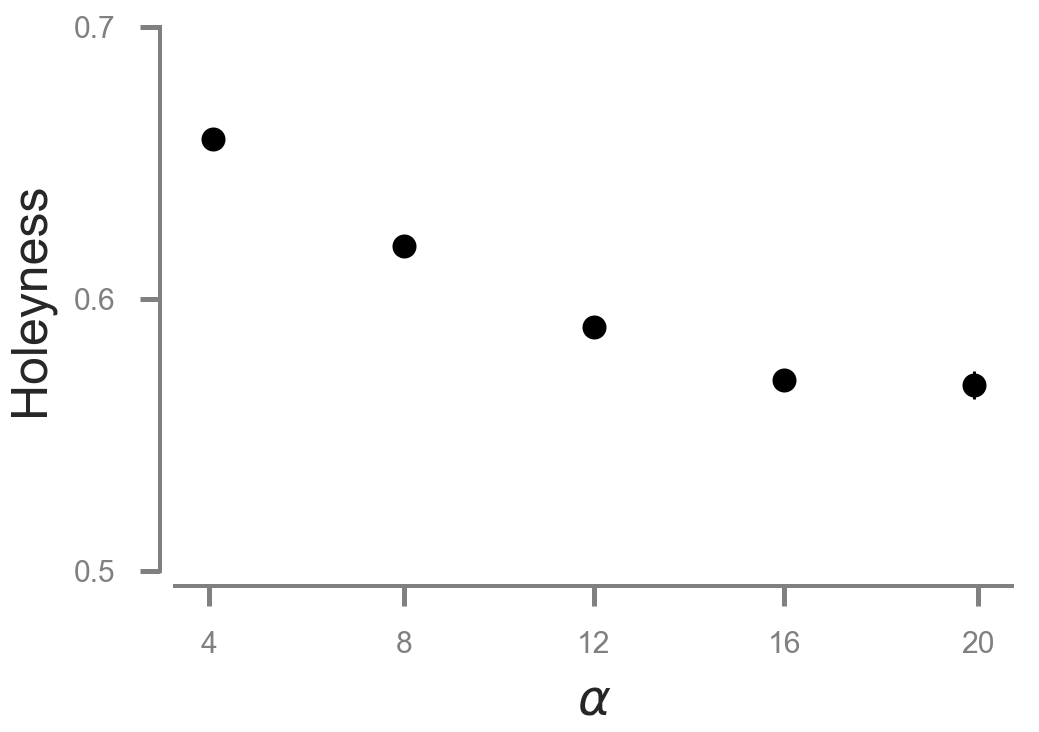

In [138]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))
plt.errorbar(m.index.tolist(), m['holeyness'].tolist(), 
    yerr=ci['holeyness'].tolist(), fmt='o', linewidth=3, capsize=0, 
    markersize=24, clip_on=False, 
    mew=0.01, elinewidth=3, color='black', ecolor='black')
plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Holeyness', fontsize= 50, labelpad=20)
plt.xlabel(r'$\alpha$', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0.5, 0.7, 3))
plt.xticks([3.9, 8, 12, 16, 20.08], [4, 8, 12, 16, 20]);

In [140]:
data3['bp_groups'] = data3['BP_ref']

In [142]:
data3['bp_groups'] = data3['BP_ref']
data3.loc[data3['BP_ref'] < 21, 'bp_groups'] = 10
data3.loc[data3['BP_ref'] > 33, 'bp_groups'] = 50
n = data3['bp_groups'].value_counts()
n

27    552
28    546
29    538
26    518
30    455
25    450
31    338
24    320
23    271
32    243
22    186
21    163
10    162
33    133
50    125
Name: bp_groups, dtype: int64

In [143]:
fdata = data3.groupby('bp_groups')
m2 = fdata.mean()
m2['n'] = 0
for i in n.index.tolist():
    m2.loc[m2.index==i, 'n'] = n[i]
m2

,BP_ref,holeyness,alpha,n
bp_groups,,,,
10,18.635802,0.579380,10.024691,162
21,21.000000,0.585898,11.730061,163
22,22.000000,0.581340,12.516129,186
23,23.000000,0.596112,11.542435,271
24,24.000000,0.594543,11.975000,320
25,25.000000,0.599175,12.186667,450
26,26.000000,0.593749,12.447876,518
27,27.000000,0.595539,12.137681,552
28,28.000000,0.607539,12.007326,546


In [144]:
s2 = fdata.std()
s2['sqrt_n'] = np.sqrt(m2['n']) 
s2['t_quant'] = t.ppf(.975, m2['n'] - 1) 
s2

,BP_ref,holeyness,alpha,sqrt_n,t_quant
bp_groups,,,,,
10,1.722183,0.076977,4.396428,12.727922,1.974808
21,0.000000,0.073460,5.676529,12.767145,1.974716
22,0.000000,0.079168,5.917656,13.638182,1.972870
23,0.000000,0.069208,5.622462,16.462078,1.968789
24,0.000000,0.072273,5.558410,17.888544,1.967428
25,0.000000,0.072123,5.682059,21.213203,1.965261
26,0.000000,0.071456,5.432208,22.759613,1.964563
27,0.000000,0.073804,5.611360,23.494680,1.964279
28,0.000000,0.071651,5.838180,23.366643,1.964326


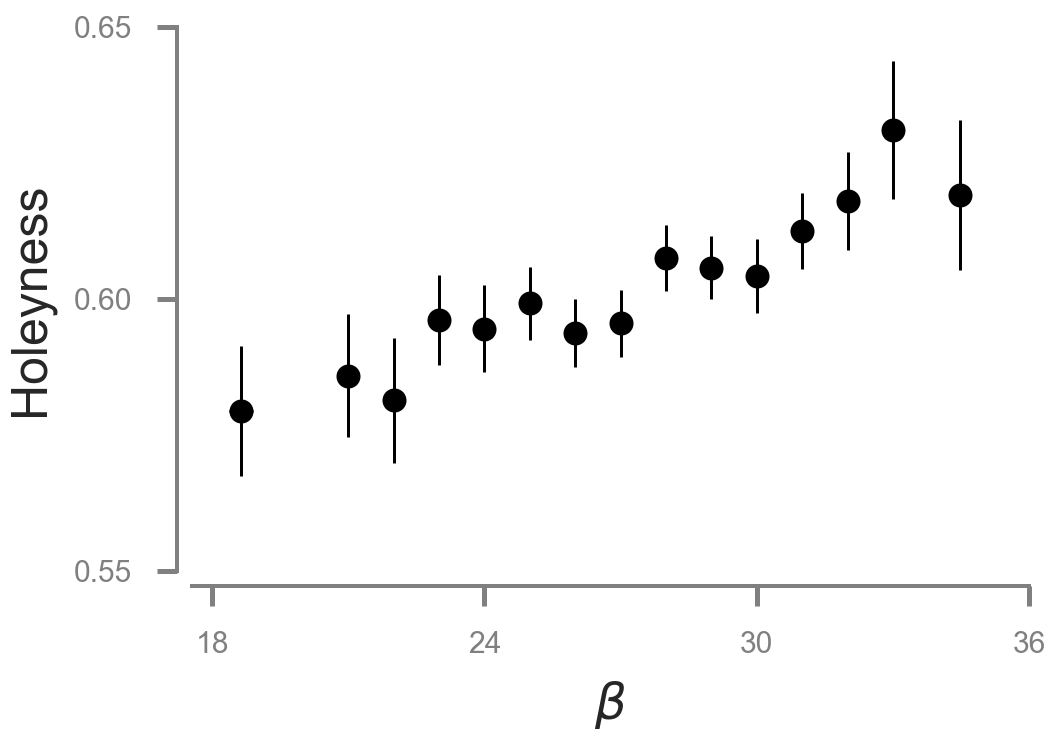

In [145]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))
plt.errorbar(m2['BP_ref'].tolist(), m2['holeyness'].tolist(), 
    xerr=(s2['BP_ref'] / s2['sqrt_n'] * s2['t_quant']).tolist(),
    yerr=(s2['holeyness'] / s2['sqrt_n'] * s2['t_quant']).tolist(), 
    fmt='o', linewidth=3, capsize=0, markersize=24, clip_on=False, 
    ms=20, mew=0.01, elinewidth=3, color='black', ecolor='black')
plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Holeyness', fontsize= 50, labelpad=20)
plt.xlabel(r'$\beta$', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0.55, 0.65, 3))
plt.xticks(np.linspace(18, 36, 4));

# Figure S6: Effect of $\alpha$ on the accumulation of inviable introgressions

In [73]:
single_4 = []
for i in stat_4.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_4.append((a + b)/2.)
single_4 = pd.DataFrame(single_4)

double_4 = []
for i in stat_4.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_4.append((a + b)/2.)
double_4 = pd.DataFrame(double_4)

triple_4 = []
for i in stat_4.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_4.append((a + b)/2.)
triple_4 = pd.DataFrame(triple_4)

single_8 = []
for i in stat_8.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_8.append((a + b)/2.)
single_8 = pd.DataFrame(single_8)

double_8 = []
for i in stat_8.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_8.append((a + b)/2.)
double_8 = pd.DataFrame(double_8)

triple_8 = []
for i in stat_8.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_8.append((a + b)/2.)
triple_8 = pd.DataFrame(triple_8)

single_16 = []
for i in stat_16.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_16.append((a + b)/2.)
single_16 = pd.DataFrame(single_16)

double_16 = []
for i in stat_16.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_16.append((a + b)/2.)
double_16 = pd.DataFrame(double_16)

triple_16 = []
for i in stat_16.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_16.append((a + b)/2.)
triple_16 = pd.DataFrame(triple_16)

single_20 = []
for i in stat_20.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single_20.append((a + b)/2.)
single_20 = pd.DataFrame(single_20)

double_20 = []
for i in stat_20.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double_20.append((a + b)/2.)
double_20 = pd.DataFrame(double_20)

triple_20 = []
for i in stat_20.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple_20.append((a + b)/2.)
triple_20 = pd.DataFrame(triple_20)

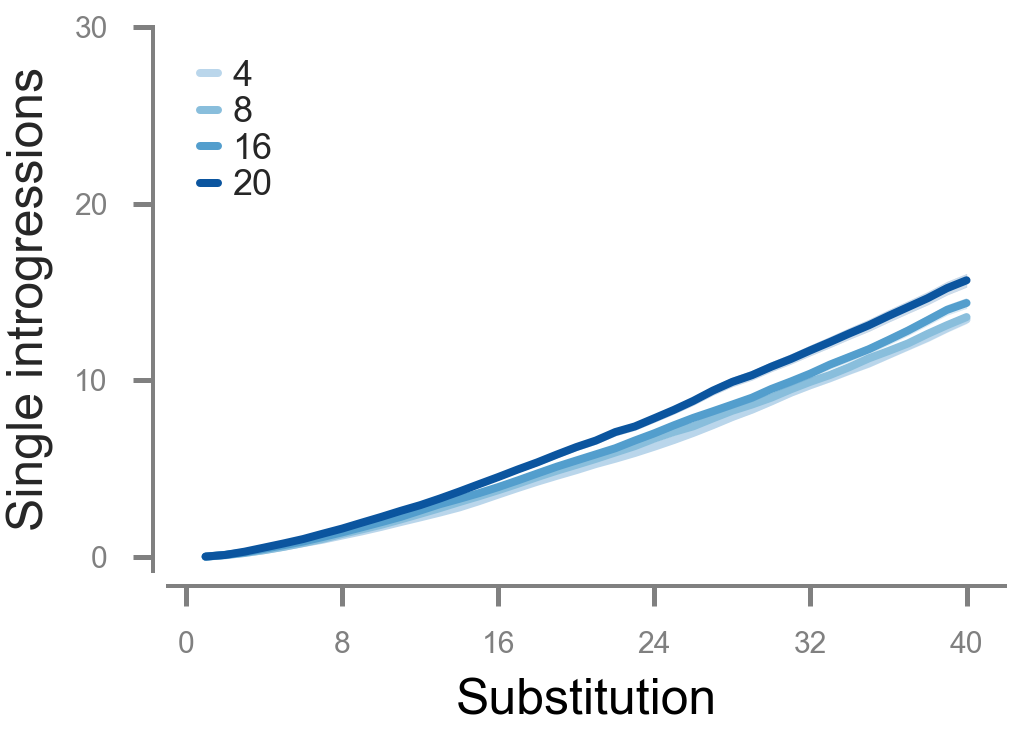

In [146]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err = 1.96 * single_4.std() / np.sqrt(len(single_4))
plt.errorbar(x, single_4.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=2, label=r'4')
ax.fill_between(x, single_4.mean() - err, single_4.mean() + err, alpha=.2, 
    zorder=1, color=col)

col = (0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
err = 1.96 * single_8.std() / np.sqrt(len(single_8))
plt.errorbar(x, single_8.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=2, label=r'8')
ax.fill_between(x, single_8.mean() - err, single_8.mean() + err, alpha=.2, 
    zorder=2, color=col)

col = (0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err = 1.96 * single_16.std() / np.sqrt(len(single_16))
plt.errorbar(x, single_16.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=3, label=r'16')
ax.fill_between(x, single_16.mean() - err, single_16.mean() + err, alpha=.2, 
    zorder=3, color=col)

col = (0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err = 1.96 * single_20.std() / np.sqrt(len(single_20))
plt.errorbar(x, single_20.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=4, label=r'20')
ax.fill_between(x, single_20.mean() - err, single_20.mean() + err, alpha=.2, 
    zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Single introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0, labelspacing=0.1,\
          numpoints=1, markerscale=0.3);

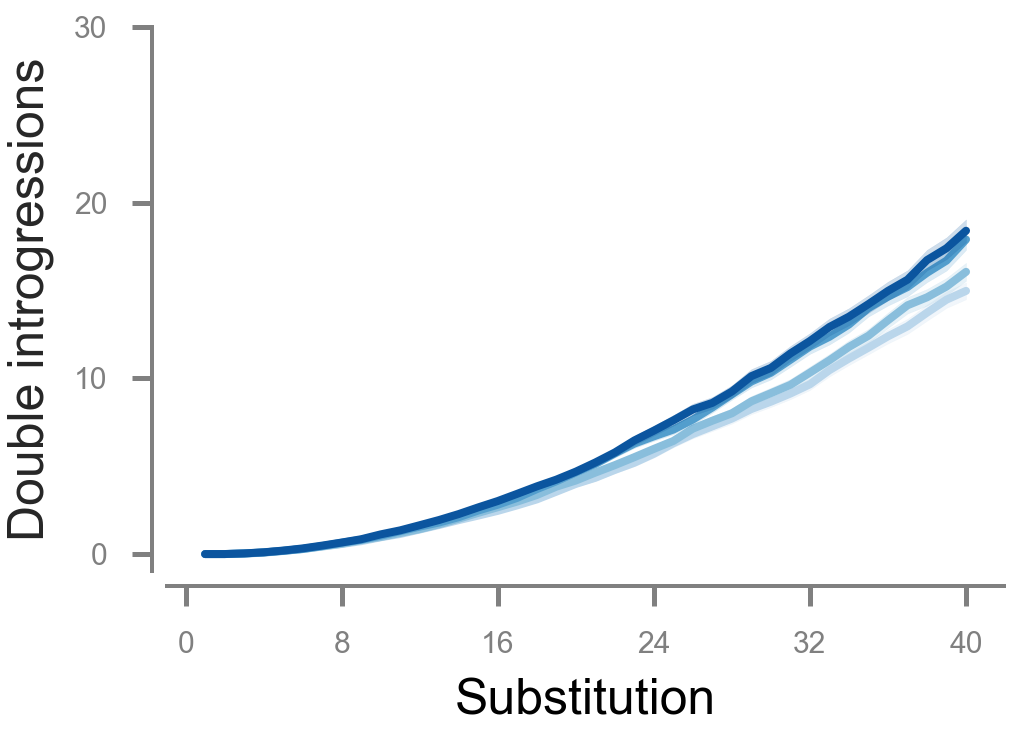

In [147]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err = 1.96 * double_4.std() / np.sqrt(len(double_4))
plt.errorbar(x, double_4.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=2, label=r'4')
ax.fill_between(x, double_4.mean() - err, double_4.mean() + err, alpha=.2, 
    zorder=1, color=col)

col = (0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
err = 1.96 * double_8.std() / np.sqrt(len(double_8))
plt.errorbar(x, double_8.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=2, label=r'8')
ax.fill_between(x, double_8.mean() - err, double_8.mean() + err, alpha=.2, 
    zorder=2, color=col)

col = (0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err = 1.96 * double_16.std() / np.sqrt(len(double_16))
plt.errorbar(x, double_16.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=3, label=r'16')
ax.fill_between(x, double_16.mean() - err, double_16.mean() + err, alpha=.2, 
    zorder=3, color=col)

col = (0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err = 1.96 * double_20.std() / np.sqrt(len(double_20))
plt.errorbar(x, double_20.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=4, label=r'20')
ax.fill_between(x, double_20.mean() - err, double_20.mean() + err, alpha=.2, 
    zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Double introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black');

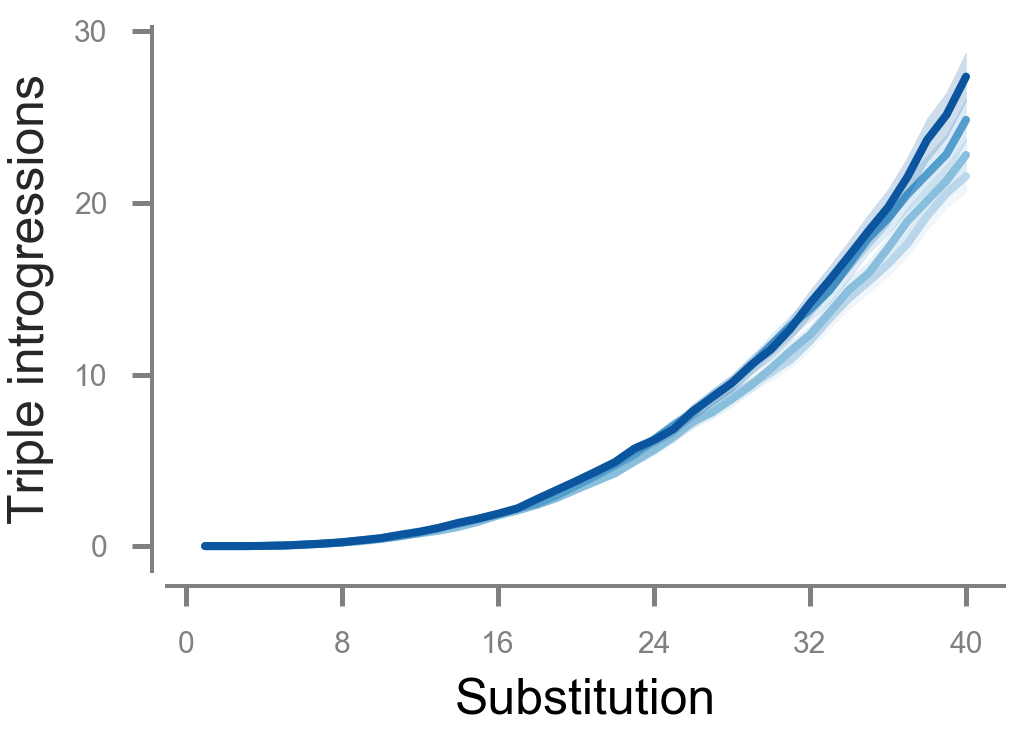

In [76]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err = 1.96 * triple_4.std() / np.sqrt(len(triple_4))
plt.errorbar(x, triple_4.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=2, label=r'4')
ax.fill_between(x, triple_4.mean() - err, triple_4.mean() + err, alpha=.2, 
    zorder=1, color=col)

col = (0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
err = 1.96 * triple_8.std() / np.sqrt(len(triple_8))
plt.errorbar(x, triple_8.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=2, label=r'8')
ax.fill_between(x, triple_8.mean() - err, triple_8.mean() + err, alpha=.2, 
    zorder=2, color=col)

col = (0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err = 1.96 * triple_16.std() / np.sqrt(len(triple_16))
plt.errorbar(x, triple_16.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=3, label=r'16')
ax.fill_between(x, triple_16.mean() - err, triple_16.mean() + err, alpha=.2, 
    zorder=3, color=col)

col = (0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err = 1.96 * triple_20.std() / np.sqrt(len(triple_20))
plt.errorbar(x, triple_20.mean(), linewidth=8, clip_on=False, color=col, 
    zorder=4, label=r'20')
ax.fill_between(x, triple_20.mean() - err, triple_20.mean() + err, alpha=.2, 
    zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Triple introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black');

# Table S3: Estimates of the parameters in Equation 6

The model was fitted by non-linear least-squares regression to the average numbers of inviable single, double, and triple introgressions shown in Figure S6.

## $\alpha = 4$ 

### Single introgressions $(i = 1)$

In [77]:
y = np.array(single_4.mean())
x = np.arange(1, 41, 1)

In [78]:
%%R -i x -i y
inv1 = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
summary(inv1)


Formula: y ~ a1 * (x - 1)^b1

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a1 0.075308   0.001282   58.76   <2e-16 ***
b1 1.413516   0.004969  284.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05671 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 9.912e-07



In [79]:
%%R 
summary(inv1)$coefficients[,2] * qt(.975, summary(inv1)$df[2])

         a1          b1 
0.002594387 0.010059126 


### Double introgressions $(i = 2)$

In [80]:
y = np.array(double_4.mean())[1:]
x = np.arange(2, 41, 1)

In [81]:
%%R -i x -i y
inv2 = nls(y ~ a2 * (x - 2) ^ b2, start=list(a2=.1, b2=.1))
summary(inv2)


Formula: y ~ a2 * (x - 2)^b2

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a2 0.0227844  0.0006313   36.09   <2e-16 ***
b2 1.7855499  0.0080577  221.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07891 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 3.274e-07



In [82]:
%%R 
summary(inv2)$coefficients[,2] * qt(.975, summary(inv2)$df[2])

         a2          b2 
0.001279132 0.016326489 


### Triple introgressions $(i = 3)$

In [83]:
y = np.array(triple_4.mean())[2:]
x = np.arange(3, 41, 1)

In [84]:
%%R -i x -i y
inv3 = nls(y ~ a3 * (x - 3) ^ b3, start=list(a3=.1, b3=.1))
summary(inv3)


Formula: y ~ a3 * (x - 3)^b3

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a3 0.0044719  0.0002013   22.22   <2e-16 ***
b3 2.3500208  0.0130332  180.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.131 on 36 degrees of freedom

Number of iterations to convergence: 15 
Achieved convergence tolerance: 8.477e-08



In [85]:
%%R 
summary(inv3)$coefficients[,2] * qt(.975, summary(inv3)$df[2])

          a3           b3 
0.0004081606 0.0264325451 


## $\alpha = 8$ 

### Single introgressions $(i = 1)$

In [86]:
y = np.array(single_8.mean())
x = np.arange(1, 41, 1)

In [87]:
%%R -i x -i y
inv1 = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
summary(inv1)


Formula: y ~ a1 * (x - 1)^b1

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a1 0.097243   0.001387    70.1   <2e-16 ***
b1 1.347027   0.004176   322.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05082 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 2.183e-06



In [88]:
%%R 
summary(inv1)$coefficients[,2] * qt(.975, summary(inv1)$df[2])

         a1          b1 
0.002808117 0.008453158 


### Double introgressions $(i = 2)$

In [89]:
y = np.array(double_8.mean())[1:]
x = np.arange(2, 41, 1)

In [90]:
%%R -i x -i y
inv2 = nls(y ~ a2 * (x - 2) ^ b2, start=list(a2=.1, b2=.1))
summary(inv2)


Formula: y ~ a2 * (x - 2)^b2

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a2 0.0223716  0.0006376   35.09   <2e-16 ***
b2 1.8083432  0.0082831  218.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08527 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 2.499e-07



In [91]:
%%R 
summary(inv2)$coefficients[,2] * qt(.975, summary(inv2)$df[2])

         a2          b2 
0.001291845 0.016783172 


### Triple introgressions $(i = 3)$

In [92]:
y = np.array(triple_8.mean())[2:]
x = np.arange(3, 41, 1)

In [93]:
%%R -i x -i y
inv3 = nls(y ~ a3 * (x - 3) ^ b3, start=list(a3=.1, b3=.1))
summary(inv3)


Formula: y ~ a3 * (x - 3)^b3

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a3 0.0028118  0.0001064   26.42   <2e-16 ***
b3 2.4945702  0.0109342  228.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1083 on 36 degrees of freedom

Number of iterations to convergence: 16 
Achieved convergence tolerance: 1.743e-07



In [94]:
%%R 
summary(inv3)$coefficients[,2] * qt(.975, summary(inv3)$df[2])

          a3           b3 
0.0002158094 0.0221756209 


## $\alpha = 16$ 

### Single introgressions $(i = 1)$

In [95]:
y = np.array(single_16.mean())
x = np.arange(1, 41, 1)

In [96]:
%%R -i x -i y
inv1 = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
summary(inv1)


Formula: y ~ a1 * (x - 1)^b1

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a1 0.100416   0.001667   60.23   <2e-16 ***
b1 1.353135   0.004859  278.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06215 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 6.228e-07



In [97]:
%%R 
summary(inv1)$coefficients[,2] * qt(.975, summary(inv1)$df[2])

         a1          b1 
0.003374973 0.009836143 


### Double introgressions $(i = 2)$

In [98]:
y = np.array(double_16.mean())[1:]
x = np.arange(2, 41, 1)

In [99]:
%%R -i x -i y
inv2 = nls(y ~ a2 * (x - 2) ^ b2, start=list(a2=.1, b2=.1))
summary(inv2)


Formula: y ~ a2 * (x - 2)^b2

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a2 0.0253849  0.0008265   30.71   <2e-16 ***
b2 1.8017644  0.0094647  190.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1084 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 3.137e-08



In [100]:
%%R 
summary(inv2)$coefficients[,2] * qt(.975, summary(inv2)$df[2])

         a2          b2 
0.001674678 0.019177405 


### Triple introgressions $(i = 3)$

In [101]:
y = np.array(triple_16.mean())[2:]
x = np.arange(3, 41, 1)

In [102]:
%%R -i x -i y
inv3 = nls(y ~ a3 * (x - 3) ^ b3, start=list(a3=.1, b3=.1))
summary(inv3)


Formula: y ~ a3 * (x - 3)^b3

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a3 0.0035376  0.0001884   18.78   <2e-16 ***
b3 2.4545393  0.0153964  159.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1693 on 36 degrees of freedom

Number of iterations to convergence: 17 
Achieved convergence tolerance: 3.642e-07



In [103]:
%%R 
summary(inv3)$coefficients[,2] * qt(.975, summary(inv3)$df[2])

          a3           b3 
0.0003820821 0.0312253506 


## $\alpha = 20$ 

### Single introgressions $(i = 1)$

In [104]:
y = np.array(single_20.mean())
x = np.arange(1, 41, 1)

In [105]:
%%R -i x -i y
inv1 = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
summary(inv1)


Formula: y ~ a1 * (x - 1)^b1

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a1 0.130088   0.001891   68.79   <2e-16 ***
b1 1.309267   0.004262  307.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0623 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 6.295e-08



In [106]:
%%R 
summary(inv1)$coefficients[,2] * qt(.975, summary(inv1)$df[2])

         a1          b1 
0.003828149 0.008627225 


### Double introgressions $(i = 2)$

In [107]:
y = np.array(double_20.mean())[1:]
x = np.arange(2, 41, 1)

In [108]:
%%R -i x -i y
inv2 = nls(y ~ a2 * (x - 2) ^ b2, start=list(a2=.1, b2=.1))
summary(inv2)


Formula: y ~ a2 * (x - 2)^b2

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a2 0.0272567  0.0007084   38.48   <2e-16 ***
b2 1.7906127  0.0075569  236.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08988 on 37 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 1.277e-08



In [109]:
%%R 
summary(inv2)$coefficients[,2] * qt(.975, summary(inv2)$df[2])

         a2          b2 
0.001435295 0.015311833 


### Triple introgressions $(i = 3)$

In [110]:
y = np.array(triple_20.mean())[2:]
x = np.arange(3, 41, 1)

In [111]:
%%R -i x -i y
inv3 = nls(y ~ a3 * (x - 3) ^ b3, start=list(a3=.1, b3=.1))
summary(inv3)


Formula: y ~ a3 * (x - 3)^b3

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a3 0.0021489  0.0001283   16.75   <2e-16 ***
b3 2.6136130  0.0172225  151.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1893 on 36 degrees of freedom

Number of iterations to convergence: 17 
Achieved convergence tolerance: 8.101e-07



In [112]:
%%R 
summary(inv3)$coefficients[,2] * qt(.975, summary(inv3)$df[2])

          a3           b3 
0.0002602365 0.0349289204 


# Figure S7: Evolution of the proportion of single inviable introgressions, $\mathcal P_1$

In [113]:
p1 = []
for i in stat.values():
    p1.append(i['p1'])
p1 = pd.DataFrame(p1)

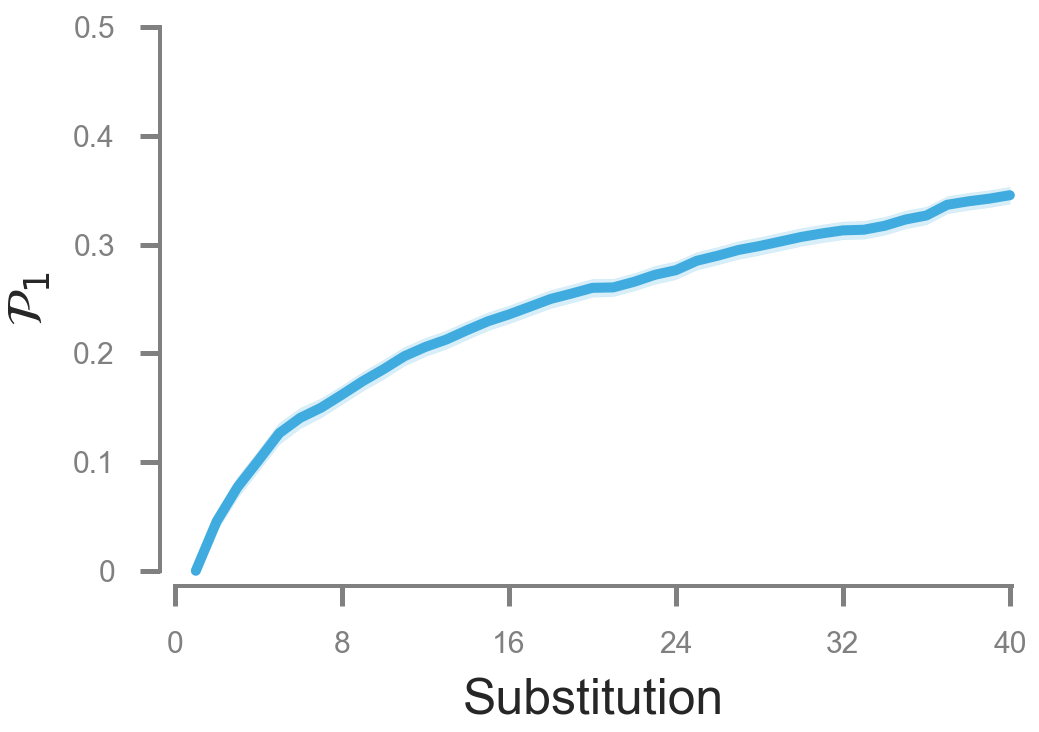

In [148]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

err = 1.96 * p1.std()/np.sqrt(len(p1))
plt.errorbar(x, p1.mean(), linewidth=10, clip_on=False, color='#40ABDF', zorder=1)
ax.fill_between(x, p1.mean() - err, p1.mean() + err, alpha=.2, color='#40ABDF', zorder=1)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',            
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'$\mathcal{P}_1$', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 0.5, 6), [ 0,  0.1,  0.2,  0.3,  0.4,  0.5])
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40.], [  0, 8, 16, 24, 32, 40])
plt.ylim(0)
plt.xlim(0, 40.1);